<a href="https://colab.research.google.com/github/aakashpaul-2/Machine-Learning-Projects/blob/main/ON_OFF_Energy_Classification_using_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Q3-data.csv to Q3-data.csv


In [ ]:
df = pd.read_csv("Q3-data.csv")
df_house_1 = df.loc[df["House"] == 1]
           
df_house_1.loc[df_house_1["TV"]  > 15, "ON/OFF"] = 1
df_house_1.loc[df_house_1["TV"]  <= 15, "ON/OFF"] = 0

X_h1 = df_house_1.iloc[:,[1,3]]
y_h1 = (df_house_1.iloc[:,2])

# Split data set: House 2

df_house_2 = df.loc[df["House"] == 2]
df_house_2.loc[df_house_2["TV"]  > 30, "ON/OFF"] = 1
df_house_2.loc[df_house_2["TV"]  <= 30, "ON/OFF"] = 0

X_h2 = df_house_2.iloc[:,[1,3]]
y_h2 = (df_house_2.iloc[:,2])

# Split data set: House 3

df_house_3 = df.loc[df["House"] == 3]
df_house_3.loc[df_house_3["TV"]  > 30, "ON/OFF"] = 1
df_house_3.loc[df_house_3["TV"]  <= 30, "ON/OFF"] = 0

X_h3 = df_house_3.iloc[:,[1,3]]
y_h3 = df_house_3.iloc[:,2]



# Data for Training Set
X_train = pd.concat([X_h1,X_h3])
X_train = X_train.values
y_train = pd.concat([y_h1, y_h3])
y_train = y_train.values.astype(np.float64)

# Test Set
X_test = X_h2.values
y_test = y_h2.values.astype(np.float64)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:850: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(new_indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scX = MinMaxScaler(feature_range = (0,1))
scY = MinMaxScaler(feature_range = (0,1))
X_train = scX.fit_transform(X = X_train)
X_test = scX.fit_transform(X = X_test)

y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)
y_train = scY.fit_transform(X = y_train)
y_test = scY.fit_transform(X = y_test)


print("X.shape", X_train.shape, "Y.shape", y_train.shape)


X.shape (2880, 2) Y.shape (2880, 1)


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


cuda:0


In [ ]:
model = nn.Sequential(nn.Linear(2, 128),nn.ReLU(), nn.Dropout(0.25), nn.Linear(128, 256), nn.ReLU(), nn.Dropout(0.2), nn.Linear(256, 512), nn.ReLU(), nn.Linear(512, 1))
model.to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.005)

In [ ]:
X_train = torch.from_numpy(X_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [ ]:
def full_gd(model,criterion,optimizer,X_train,y_train,X_test,y_test,epochs=1500):
    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)
    
    for it in range(epochs):
        optimizer.zero_grad()
        
        outputs = model(X_train)
        loss = criterion(outputs,y_train)
        loss.backward()
        optimizer.step()
        
        train_losses[it] = loss.item()
        
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs,y_test)
        test_losses[it] = test_loss.item()
        
        print("Epoch: {}, Train Loss: {}, Test Loss: {}".format(it,loss.item(),test_loss.item()))
        
    return train_losses, test_losses       

train_losses, test_losses = full_gd(model,criterion,optimizer,X_train,y_train,X_test,y_test) 

Epoch: 0, Train Loss: 0.11096994578838348, Test Loss: 0.23715320229530334
Epoch: 1, Train Loss: 0.06611469388008118, Test Loss: 0.20503968000411987
Epoch: 2, Train Loss: 0.06018497794866562, Test Loss: 0.20161527395248413
Epoch: 3, Train Loss: 0.07051193714141846, Test Loss: 0.20165041089057922
Epoch: 4, Train Loss: 0.06670303642749786, Test Loss: 0.20287317037582397
Epoch: 5, Train Loss: 0.06009722873568535, Test Loss: 0.20824114978313446
Epoch: 6, Train Loss: 0.05724509060382843, Test Loss: 0.21481256186962128
Epoch: 7, Train Loss: 0.057406459003686905, Test Loss: 0.22060810029506683
Epoch: 8, Train Loss: 0.058681607246398926, Test Loss: 0.22382639348506927
Epoch: 9, Train Loss: 0.05960845202207565, Test Loss: 0.22405767440795898
Epoch: 10, Train Loss: 0.06029186770319939, Test Loss: 0.224107027053833
Epoch: 11, Train Loss: 0.05933656916022301, Test Loss: 0.21956798434257507
Epoch: 12, Train Loss: 0.05816364288330078, Test Loss: 0.21733053028583527
Epoch: 13, Train Loss: 0.0569355860

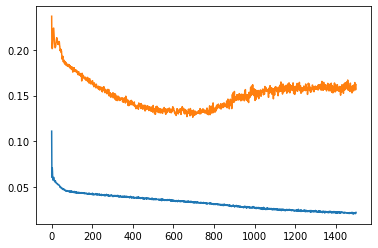

In [ ]:
plt.plot(train_losses, label="train")
plt.plot(test_losses, label = "test")

In [ ]:
with torch.no_grad():
  y_pred = model(X_test)
  y_pred = y_pred.cpu()
  y_pred = scY.inverse_transform(y_pred)
  y_test = y_test.cpu()
  y_test = scY.inverse_transform(y_test)

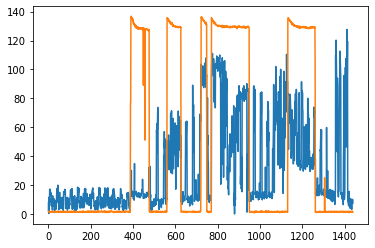

In [ ]:
plt.plot(y_pred, label="pred")
plt.plot(y_test)

In [ ]:
y_test 


array([[1.67400005],
       [1.42700003],
       [1.45599999],
       ...,
       [1.68700001],
       [1.68499995],
       [1.14499998]])

In [ ]:
y_pred = y_pred  > 25
#y_pred = y_pred.astype(int)

y_test = y_test  > 25
#y_test = y_test.astype(int)


In [ ]:
from sklearn.metrics import confusion_matrix

cm_rnn_test = confusion_matrix( y_pred,y_test)

In [ ]:
cm_rnn_test

array([[760, 110],
       [189, 381]])

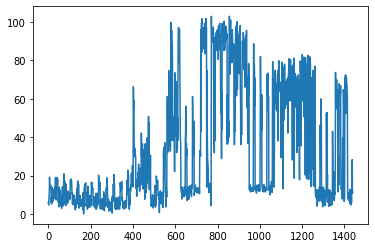

In [ ]:
plt.plot(validation_predictions, label="pred")

In [ ]:
validation_predictions.dtype

dtype('float64')

In [ ]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

cuda:0
